# NLP Basic Assignment
## NLP 맛보기 - spam.csv를 가지고 유의미한 해석을 도출해주세요!

In [1]:
# 필요한 모듈 불러오기
import pandas as pd

## Load Data
- 보시면 아시다시피 spam.csv는 라벨이 있는 데이터입니다. 물론 7주차 주제가 텍스트 기초인만큼 텍스트만 활용하셔도 되고, 라벨까지 활용하셔서 모델을 돌려보셔도 좋습니다 :)

In [2]:
spam = pd.read_csv('spam.csv')

In [3]:
spam.iloc[5]['v2']

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

## Tokenizing


In [4]:
import nltk

In [5]:
# 예시 코드 코드
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/kwon-
[nltk_data]     yujin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
import re
# 특수문자 제거
spam['v2'] = spam['v2'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))
# 소문자 처리
spam['v2'] = spam['v2'].apply(lambda x: x.lower())

In [7]:
from nltk.corpus import stopwords
nltk.download('stopwords')

# 불용어 처리
stop_words = set(stopwords.words('english')) 

spam["v2"] = spam["v2"].map(lambda x: x.split())
spam["v2"] = spam["v2"].map(lambda x: [x_ for x_ in x if x_ in stop_words])
spam["v2"] = spam["v2"].map(lambda x: " ".join(x))

[nltk_data] Downloading package stopwords to /Users/kwon-
[nltk_data]     yujin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Embedding

- 수업에서 다룬 임베딩 방법에는 One-hot encoding, CBOW, Skip-gram, GloVe, FastText가 있었습니다. 다양한 시도와 '비교' 결과를 함께 적어주세요! 파라미터를 조정해가는 과정도 해석에 도움이 될 수 있겠죠 :)

#### TF-IDF

In [15]:
spam.query("v1=='ham'")["v2"]

0                                [until, only, in, there]
1                                                      []
3                                              [so, then]
4                           [i, don, t, he, to, he, here]
6                   [my, is, not, to, with, me, they, me]
                              ...                        
5565                                                  [y]
5568                                           [will, to]
5569                 [was, in, for, that, so, any, other]
5570    [the, did, some, but, i, i, d, be, in, and, he...
5571                                       [its, to, its]
Name: v2, Length: 4825, dtype: object

In [16]:
spam.query("v1=='spam'")["v2"]

2                      [in, a, to, to, to, t, s, over, s]
5       [there, it, s, been, s, now, and, no, i, d, so...
8                  [as, a, you, have, been, to, to, only]
9       [had, your, or, more, to, to, the, with, for, ...
11                                [to, from, to, and, to]
                              ...                        
5537                                            [in, now]
5540                                [if, in, a, in, i, o]
5547              [had, your, all, on, for, no, to, from]
5566    [from, o, to, and, of, this, with, your, no, and]
5567    [this, is, the, we, have, have, won, the, is, ...
Name: v2, Length: 747, dtype: object

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_ham = TfidfVectorizer(max_features=500)
res_tfidf_ham = tfidf_ham.fit_transform(spam.query("v1=='ham'")["v2"])
res_tfidf_ham = pd.DataFrame({"word":tfidf_ham.get_feature_names(), "value":res_tfidf_ham.sum(axis=0).flat})

tfidf_spam = TfidfVectorizer(max_features=500)
res_tfidf_spam = tfidf_spam.fit_transform(spam.query("v1=='spam'")["v2"])
res_tfidf_spam = pd.DataFrame({"word":tfidf_spam.get_feature_names(), "value":res_tfidf_spam.sum(axis=0).flat})

/Users/kwon-yujin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#### Word2Vec

In [9]:
spam["v2"] = spam["v2"].map(lambda x: x.split(" "))

from gensim.models import Word2Vec
w2v = Word2Vec(spam["v2"], sg=1)

In [10]:
from gensim.models import FastText
ft = FastText(spam["v2"], sg=1)

## 본인이 도출해낸 해석을 적어주세요!

- 유사도, Wordcloud, 이진 분류 모델, Plot 뭐든 상관없으니 분명하고 인상적인 해석을 적어주시면 됩니다.

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

- Ham과 SPAM의 tfidf 비교
  - spam에는 now라는 단어가 많이 등장한다.

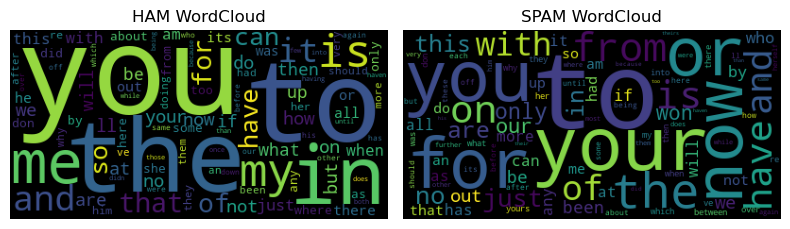

In [43]:
wc_ham = WordCloud(max_words=100)
cloud_ham = wc_ham.generate_from_frequencies(res_tfidf_ham.set_index("word").to_dict()["value"])
wc_spam = WordCloud(max_words=100)
cloud_spam = wc_spam.generate_from_frequencies(res_tfidf_spam.set_index("word").to_dict()["value"])

fig, axes = plt.subplots(1,2, figsize=(8,6))
axes[0].imshow(cloud_ham)
axes[0].set_title("HAM WordCloud")
axes[0].axis("off")

axes[1].imshow(cloud_spam)
axes[1].set_title("SPAM WordCloud")
axes[1].axis("off")
plt.tight_layout()
plt.show()

word2vec과 fasttext의 embedding을 활용해 유사어 분석

In [44]:
w2v.wv.most_similar("now")

[('more', 0.9942166209220886),
 ('yours', 0.993760883808136),
 ('no', 0.9934967756271362),
 ('between', 0.9930506944656372),
 ('only', 0.9929092526435852),
 ('yourself', 0.9928498268127441),
 ('o', 0.9928060173988342),
 ('just', 0.9926662445068359),
 ('each', 0.99214768409729),
 ('am', 0.9920865297317505)]

In [45]:
ft.wv.most_similar("now")

[('aren', 0.9975855350494385),
 ('having', 0.9974005818367004),
 ('up', 0.9972218871116638),
 ('how', 0.9966557025909424),
 ('before', 0.9960659742355347),
 ('all', 0.9960209131240845),
 ('what', 0.9958385229110718),
 ('that', 0.9953902959823608),
 ('yourself', 0.9952743649482727),
 ('and', 0.995211124420166)]